In [386]:
import face_recognition
from PIL import Image, ImageDraw, ImageShow
import cv2
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.spatial import distance
from scipy import signal
import hashlib
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

%matplotlib inline

In [387]:
image1_name = "SAM_ID.jpg"
image2_name = "SAM5.jpg"

image1_f = "face_" + image1_name
image2_f = "face_" + image2_name

image1_fl = "face_LandMark_" + image1_name
image2_fl = "face_LandMark_" + image2_name

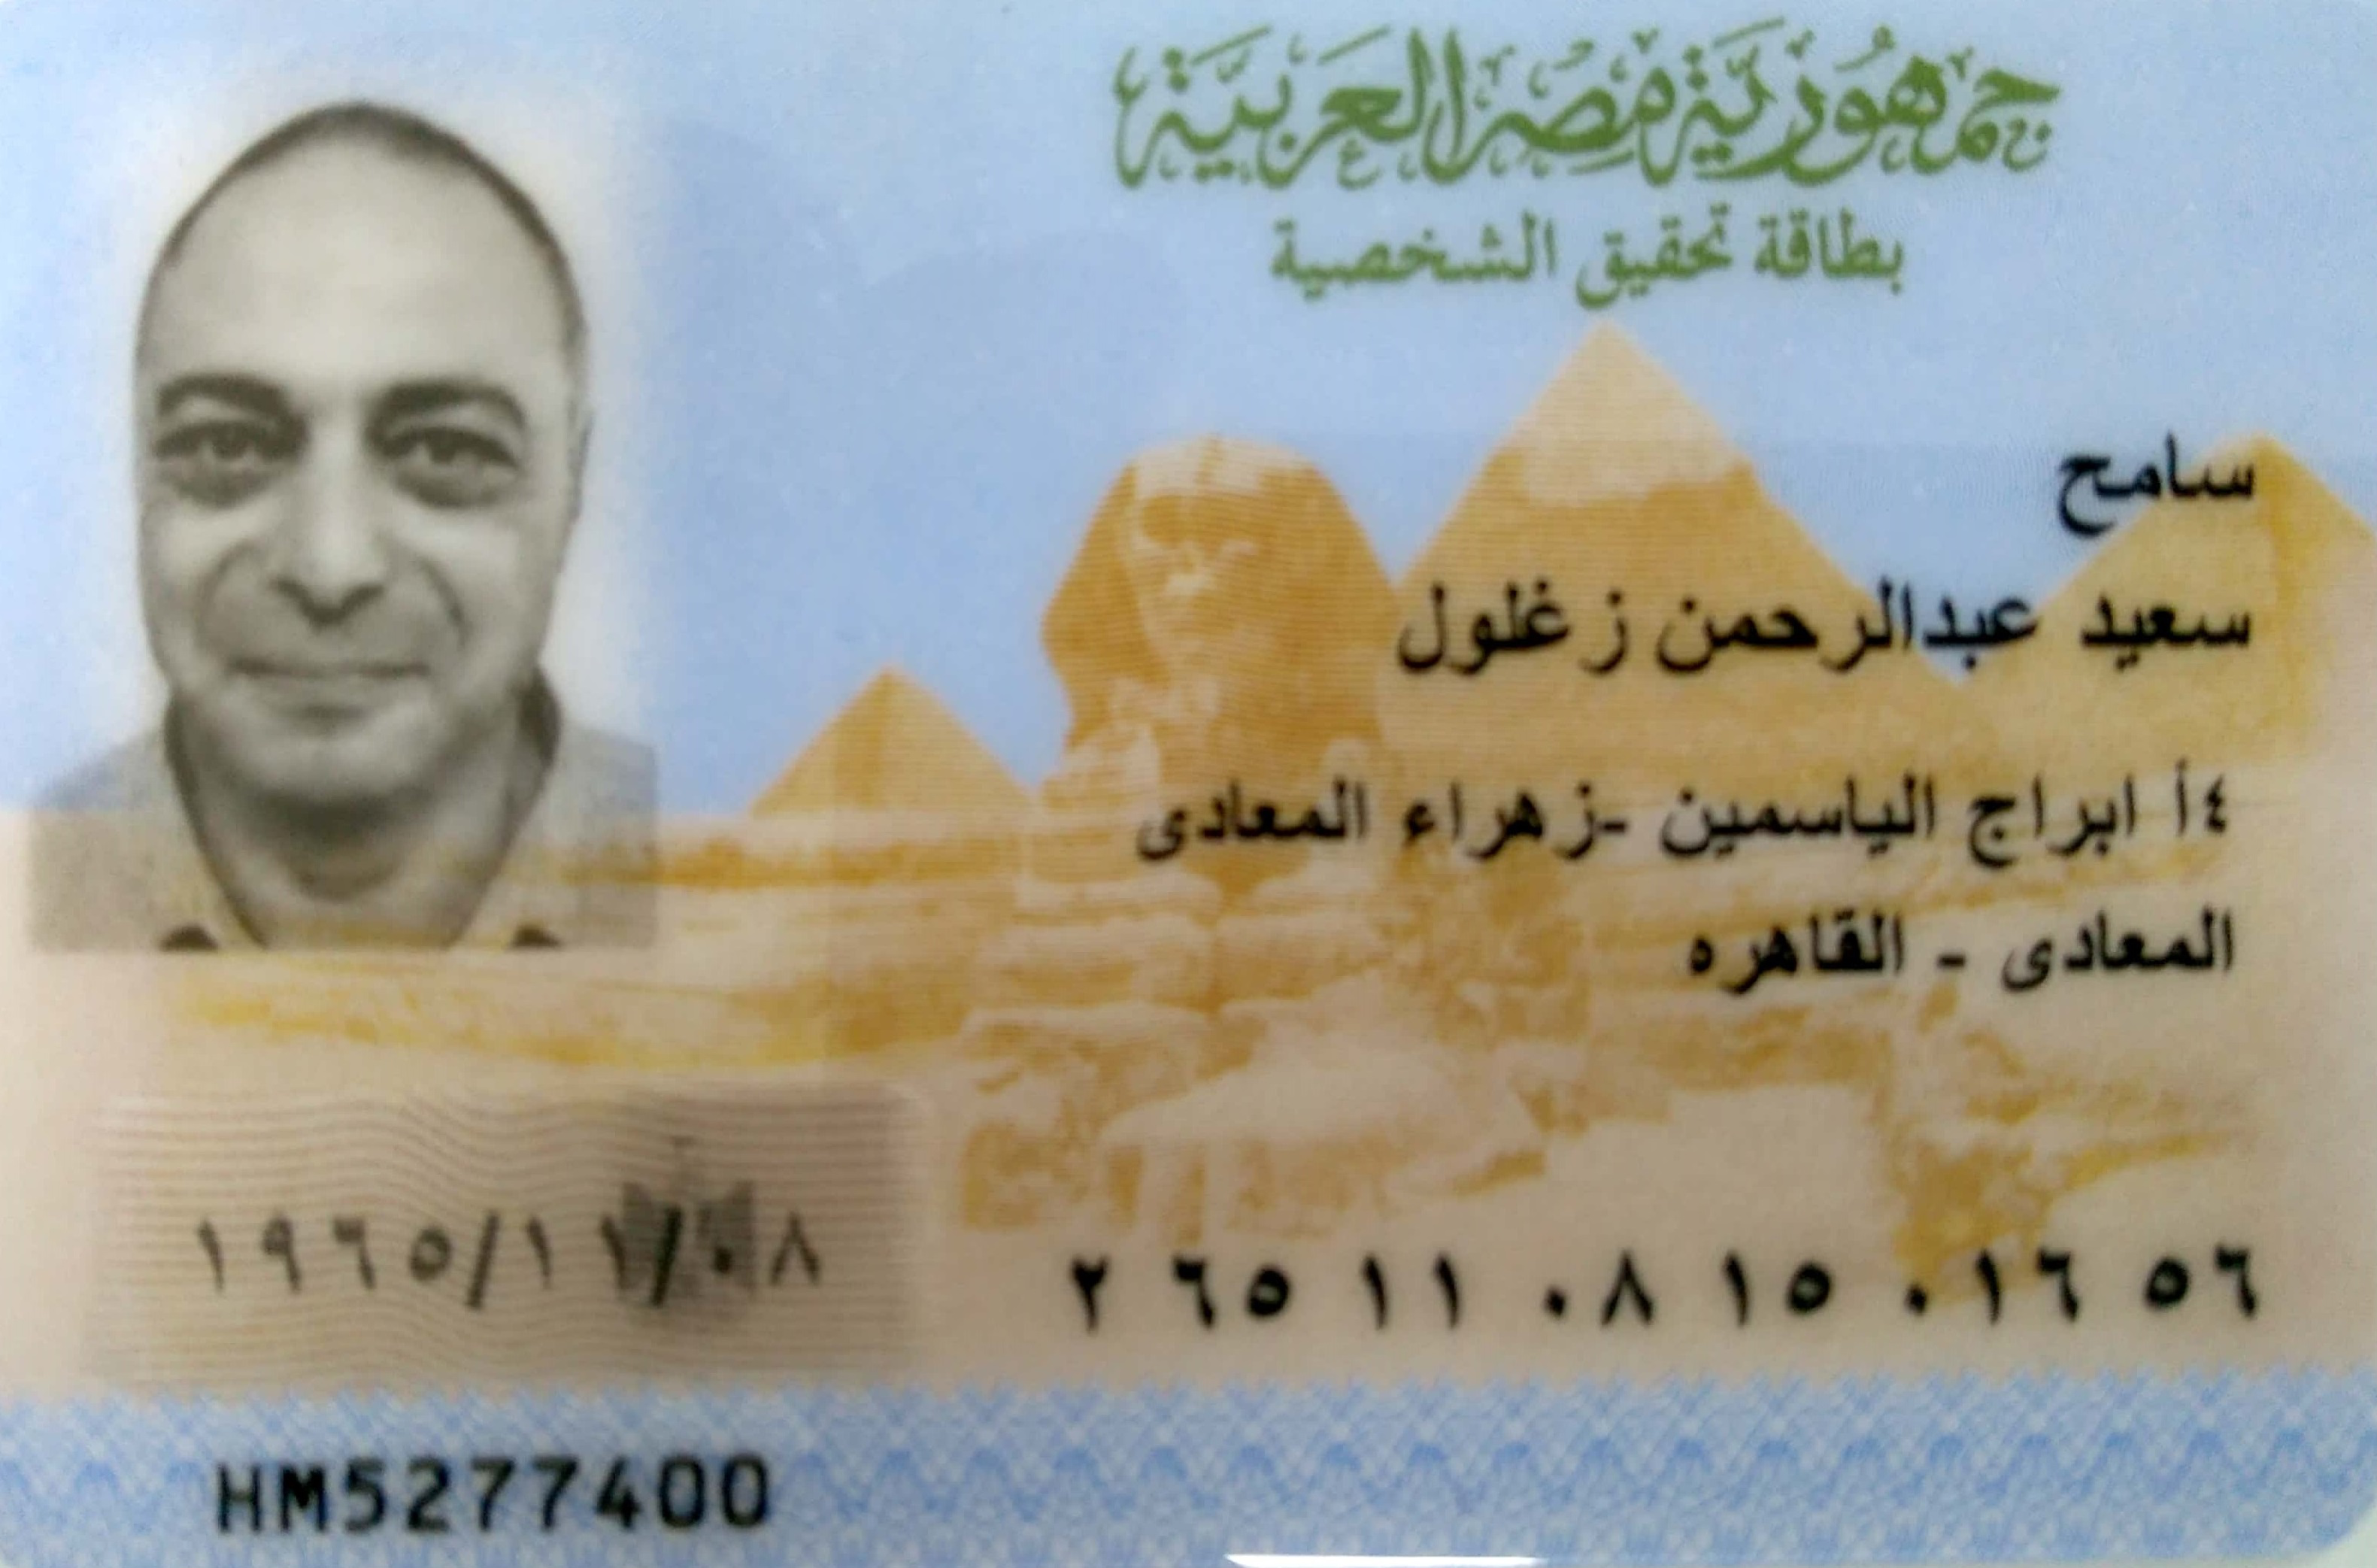

In [388]:
# Load first Image (ID)
image1 = face_recognition.load_image_file(image1_name)
image1_encoding = face_recognition.face_encodings(image1)[0]
pil_image = Image.fromarray(image1)
display(pil_image)

In [389]:
# Locate Face on the ID
face_locations = face_recognition.face_locations(image1)
face_location = face_locations[0]
top, right, bottom, left = face_location
face_image1 = image1[top:bottom, left:right]
image1_encoding = face_recognition.face_encodings(face_image1)[0]
pil_image = Image.fromarray(face_image1)
#display(pil_image)
pil_image.save(image1_f)

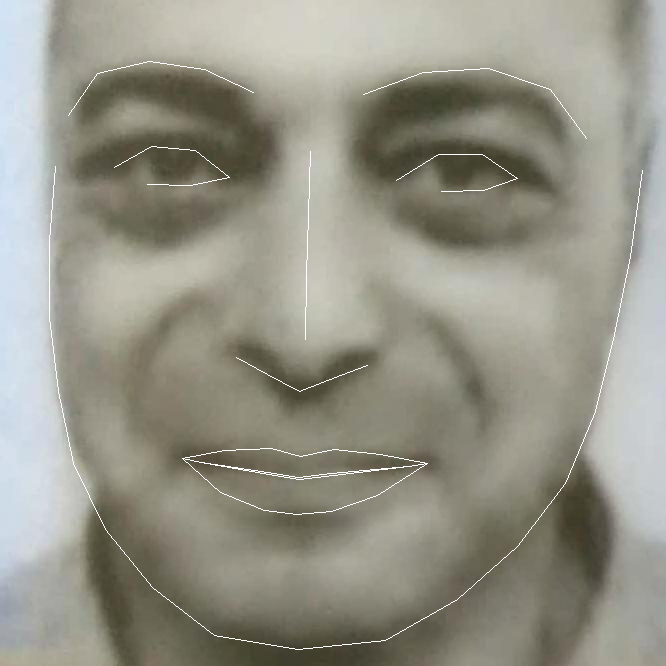

In [390]:
# Load the image and detect face landmarks
image = face_recognition.load_image_file(image1_f)
face_landmarks_list = face_recognition.face_landmarks(image)

# Make a PIL image from the loaded image and then get a drawing object
img = Image.fromarray(image, 'RGB')
img_draw = ImageDraw.Draw(img)

# Draw all the features for the first face
face_landmarks = face_landmarks_list[0]  # Get the first object corresponding to the first face
img_draw.line(face_landmarks['chin'])
img_draw.line(face_landmarks['left_eyebrow'])
img_draw.line(face_landmarks['right_eyebrow'])
img_draw.line(face_landmarks['nose_bridge'])
img_draw.line(face_landmarks['nose_tip'])
img_draw.line(face_landmarks['left_eye'])
img_draw.line(face_landmarks['right_eye'])
img_draw.line(face_landmarks['top_lip'])
img_draw.line(face_landmarks['bottom_lip'])

img.save(image1_fl)
img  # Show the Face image for with Landmarks

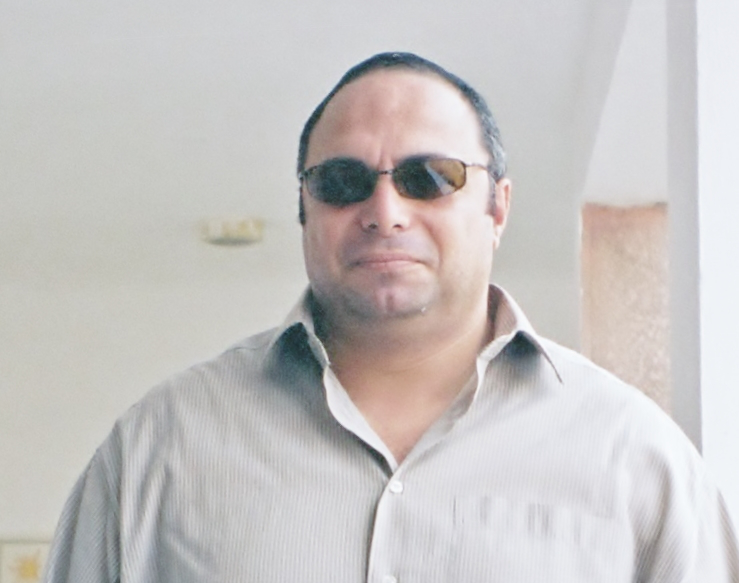

In [391]:
# Load Second Image (Person Photo to be compared)
image2 = face_recognition.load_image_file(image2_name)
image2_encoding = face_recognition.face_encodings(image2)[0]
pil_image = Image.fromarray(image2)
display(pil_image)

In [392]:
# Locate Face on the Person Photo
face_locations = face_recognition.face_locations(image2)
face_location = face_locations[0]
top, right, bottom, left = face_location
face_image2 = image2[top:bottom, left:right]
image2_encoding = face_recognition.face_encodings(face_image2)[0]
pil_image = Image.fromarray(face_image2)
#display(pil_image)
pil_image.save(image2_f)

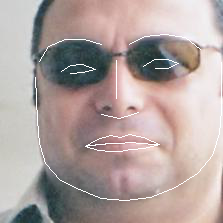

In [393]:
# Load the image and detect face landmarks
image = face_recognition.load_image_file(image2_f)
face_landmarks_list = face_recognition.face_landmarks(image)

# Make a PIL image from the loaded image and then get a drawing object
img = Image.fromarray(image, 'RGB')
img_draw = ImageDraw.Draw(img)

# Draw all the features for the first face
face_landmarks = face_landmarks_list[0]  # Get the first object corresponding to the first face
img_draw.line(face_landmarks['chin'])
img_draw.line(face_landmarks['left_eyebrow'])
img_draw.line(face_landmarks['right_eyebrow'])
img_draw.line(face_landmarks['nose_bridge'])
img_draw.line(face_landmarks['nose_tip'])
img_draw.line(face_landmarks['left_eye'])
img_draw.line(face_landmarks['right_eye'])
img_draw.line(face_landmarks['top_lip'])
img_draw.line(face_landmarks['bottom_lip'])

img.save(image2_fl)
img  # Show the Face image for with Landmarks

In [394]:
#Comapre and print result (True/False)
result = face_recognition.compare_faces([image1_encoding], image2_encoding)
print("Match is ", result)

Match is  [True]


In [395]:
#Calculate % Match (distance/diff - smaller is better - Threshold is < 0.6)
face_distances = face_recognition.face_distance([image1_encoding],
                                                image2_encoding)
Distance = face_distances[0]
print("Distance is ", Distance)

Distance is  0.5389912936019888


In [396]:
# Review Encdoed Image Array Properties 

In [397]:
image1_encoding

array([-0.02186848, -0.01965787,  0.00259056, -0.02478239, -0.01664969,
       -0.10610676,  0.01094741, -0.10516758,  0.1641904 , -0.05527563,
        0.04666785,  0.03058797, -0.21281168, -0.05096135, -0.03531396,
        0.01876267, -0.1471884 , -0.17623644, -0.07147589, -0.13817489,
        0.02247795, -0.01721558,  0.00287753, -0.03523913, -0.13280749,
       -0.26787668, -0.11253233, -0.08611919,  0.11226708, -0.07205713,
        0.04050874,  0.04379646, -0.23793121, -0.0674388 ,  0.01317088,
        0.06752713,  0.0316345 , -0.01287185,  0.21310566,  0.09798969,
       -0.16457979,  0.05986524,  0.02185974,  0.31062165,  0.16524121,
        0.03121643,  0.02749716, -0.08912773,  0.12348939, -0.15608677,
        0.08625095,  0.19935334,  0.17486231,  0.03266001,  0.09862867,
       -0.07852125,  0.08339813,  0.05880124, -0.25655615,  0.09623435,
        0.14796887, -0.0164279 , -0.03338929, -0.00348215,  0.07984443,
       -0.01001007, -0.04321972, -0.10640779,  0.18091317, -0.23

In [398]:
#plt.figure(figsize=(20,10))
#plt.plot(image1_encoding)
#plt.show()

In [399]:
image2_encoding

array([-0.07551383,  0.08232871,  0.01339892, -0.05407017, -0.04303373,
       -0.02614599, -0.01839652, -0.04095102,  0.16063437,  0.01018693,
        0.14140368, -0.02759282, -0.26631302, -0.08233918,  0.02208034,
        0.03428954, -0.22120175, -0.17079294, -0.02433493, -0.05973022,
        0.05689525, -0.02454692,  0.0062798 ,  0.01991949, -0.18420176,
       -0.37112671, -0.07942626, -0.16381201,  0.12649101, -0.17628941,
        0.06931719,  0.05553307, -0.16552632, -0.04630527,  0.00108975,
        0.14467177, -0.02062003, -0.06426345,  0.21003476,  0.01263061,
       -0.17689484, -0.01729994, -0.04414195,  0.33569509,  0.16239862,
        0.02254995,  0.04208624, -0.03692794,  0.14499682, -0.22603855,
        0.06833099,  0.23409024,  0.10641924,  0.05426788,  0.1422513 ,
       -0.07233252,  0.08305469,  0.0683917 , -0.30100444,  0.04065674,
        0.07731198,  0.0034715 ,  0.00200938, -0.03578103,  0.14419319,
       -0.01067216, -0.11836021, -0.09787194,  0.16235006, -0.16

In [400]:
#plt.figure(figsize=(20,10))
#plt.plot(image2_encoding)
#plt.show()

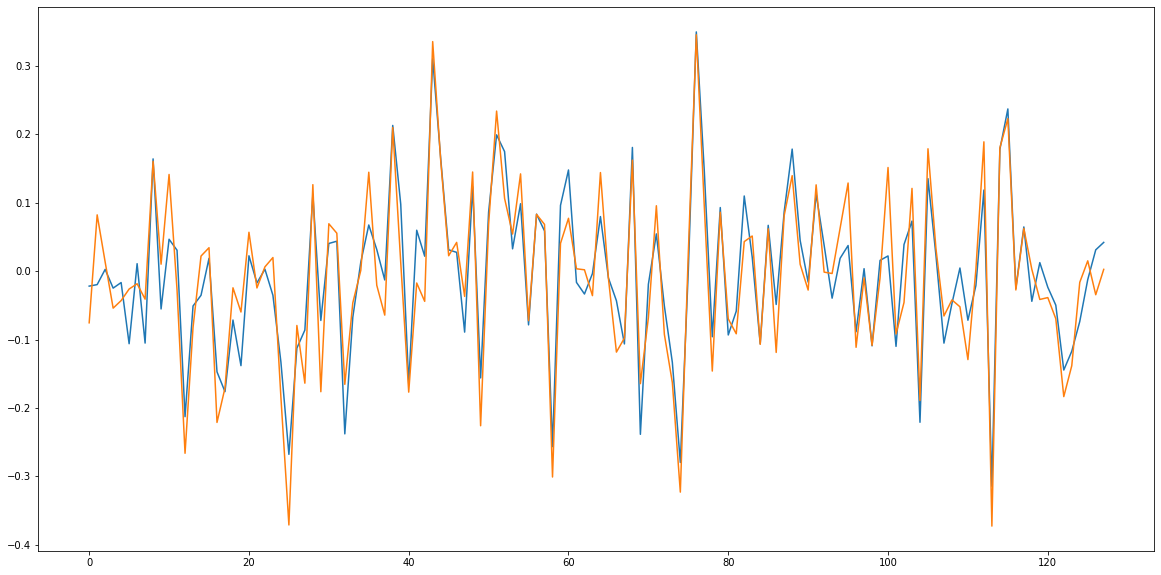

In [401]:
# Comparing the two Encoded Image Arrayes 
# Overlay Plot for the two compared Face Image "Signals/Waves"
plt.figure(figsize=(20,10))
plt.plot(image1_encoding)
plt.plot(image2_encoding)

plt.show()

In [402]:
# Linear Distance - the two Encoded Image Arrayes 

In [403]:
dist = np.linalg.norm(image1_encoding-image2_encoding)
print(dist)

0.5389912936019888


In [404]:
# Euclidian Disoatance - the two Encoded Image Arrayes 

In [405]:
dist = distance.euclidean(image1_encoding, image2_encoding)
print(dist)

0.5389912936019888


In [406]:
# DTW - Dynamic Time Wrapping

In [407]:
path = dtw.warping_path(image1_encoding, image2_encoding)
dtwvis.plot_warping(image1_encoding, image2_encoding, path, filename="DTW.png")

(None, None)

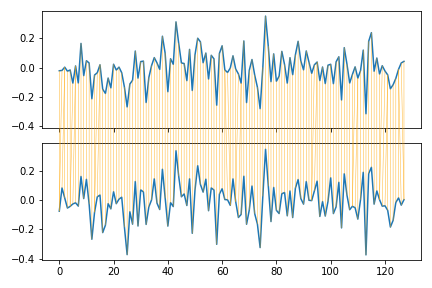

In [408]:
img = Image.open("DTW.png")
img

In [409]:
distance = dtw.distance(image1_encoding, image2_encoding)
print(distance)

0.5244728760775108


In [410]:
# Signal Cross-Correlation ... Threshold > 90%

In [411]:
accuracy = np.corrcoef(image1_encoding, image2_encoding)
print (accuracy)

accuracy_s = np.square(accuracy)
print (accuracy_s)

accuracy_percent = np.sum(accuracy_s) / 4.0 * 100.0 
print(accuracy_percent)

[[1.         0.92705406]
 [0.92705406 1.        ]]
[[1.         0.85942923]
 [0.85942923 1.        ]]
92.97146145089299


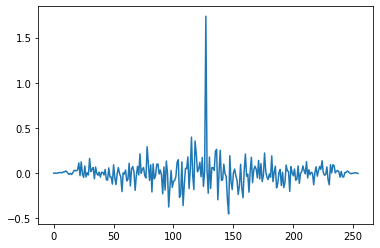

In [412]:
image_coor = scipy.signal.correlate(image1_encoding, image2_encoding)

plt.plot(image_coor)
plt.show()